In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
names = ['buying','maint','doors','persons','lug_boot','safety','acceptability']
ds = pd.read_csv(url,names=names)


In [3]:
ds.shape

(1728, 7)

In [4]:
ds.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
ds.info()
# print ds.iloc[1723]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying           1728 non-null object
maint            1728 non-null object
doors            1728 non-null object
persons          1728 non-null object
lug_boot         1728 non-null object
safety           1728 non-null object
acceptability    1728 non-null object
dtypes: object(7)
memory usage: 47.3+ KB
buying             low
maint              low
doors            5more
persons           more
lug_boot           med
safety             med
acceptability     good
Name: 1723, dtype: object


In [6]:
le = LabelEncoder()
data = ds.apply(LabelEncoder().fit_transform)
# data

In [8]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,acceptability
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [9]:
data.apply(lambda x: sum(x.isnull()),axis=0)

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

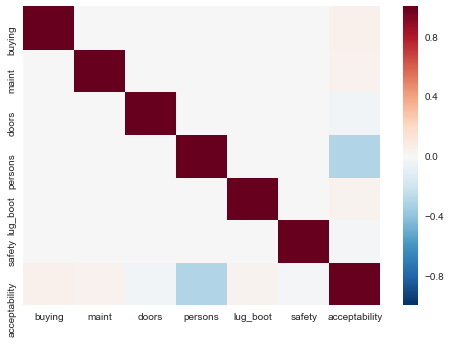

In [10]:
sns.heatmap(data.corr())

In [7]:
# cols_to_drop = ['persons']
# data = data.drop(cols_to_drop,axis=1)

In [9]:
# cov = np.cov(data['persons'],data['doors'])
# print cov

In [10]:
# bet = cov[1,0]/cov[0,0]
# print bet

In [12]:
df = data.values
np.random.shuffle(df)
# print df[:10,:]
# data['persons'].hist()

In [13]:
split = int(0.80*data.shape[0])
# print data
X = df[:,:6]
y = df[:,6]
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
print X_train.shape,y_train.shape

(1382, 6) (1382,)


In [14]:
X = X.astype(int)
y = y.astype(int)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [1]:
# dt = DecisionTreeClassifier()
# dt.fit(X_train,y_train)
# print dt.score(X_test,y_test)

In [17]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
print rf.score(X_test,y_test)

0.976878612717


In [18]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
print kn.score(X_test,y_test)

0.916184971098


In [19]:
rf.feature_importances_

array([ 0.19247702,  0.15275474,  0.06664485,  0.22655815,  0.08751948,
        0.27404577])